In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dji.csv', header=1, index_col=0, usecols=[0,1,2,3,4])

df.head()

,Date,Dow Jones value,RIS Forecast Volume,RIS Actual Volume
NaN,1/4/2016,17148.94,6547,6886
NaN,1/5/2016,17158.66,4328,4928
NaN,1/6/2016,16906.51,3987,3713
NaN,1/7/2016,16514.10,4006,3910
NaN,1/8/2016,16346.45,4107,3797


In [26]:
df.index = pd.to_datetime(df['Date'])

In [27]:
df = df.drop('Date', 1)
df.columns = ['DJI', 'forecast', 'actual']
df.head()

,DJI,forecast,actual
Date,,,
2016-01-04,17148.94,6547,6886
2016-01-05,17158.66,4328,4928
2016-01-06,16906.51,3987,3713
2016-01-07,16514.10,4006,3910
2016-01-08,16346.45,4107,3797


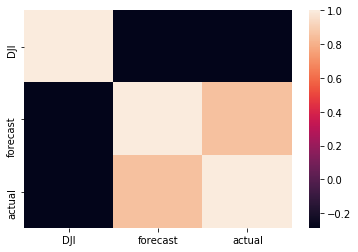

In [28]:
import seaborn as sns

sns.heatmap(df.corr())

There is a weak negative correlation between DJI and actual and forecast volume (when dji goes down, volume tends to increase), while there is a strong positive correlation between actual and forecast volume (when actual volume increases, forecast volume tends to increase per the forecasting model)

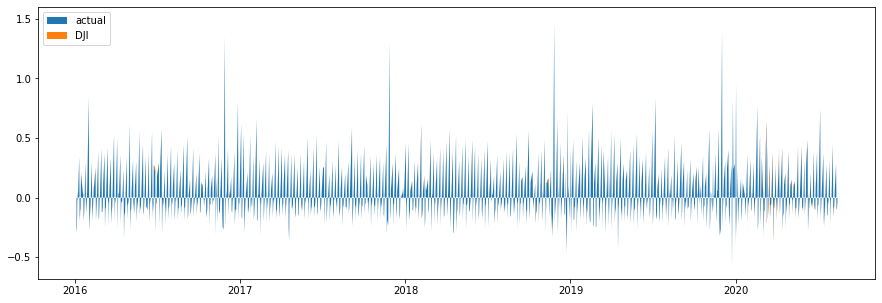

In [34]:
plt.figure(figsize=(15,5))
plt.stackplot(df.index, df['actual'], df['DJI'], baseline='zero',
              labels= ['actual', 'DJI'])
plt.legend(loc='upper left')
plt.show()

In [30]:
df = df.pct_change()

<Figure size 1080x360 with 0 Axes>

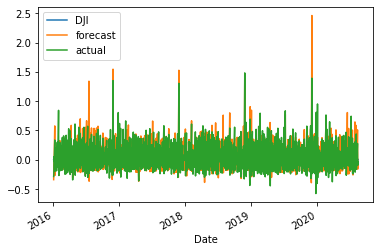

In [35]:
plt.figure(figsize=(15,5))
df.plot()
plt.show()